# Final Project : COVID-19 Analysis and Visulization
##### Author: Shawn, Eric, Shizhe Zeng

Welcome! We first import some needed packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

$\color{red}{\text{TO DO}}$.
1. add axis names and plot titles

## Goal
$\color{red}{\text{ADD MORE HERE}}$.
The goal of this part of the project is to make a linear model to predict mortality rates in different states and countries. 

#  §1. Preparing Data

$\color{red}{\text{DELETE THIS, variable name changed}}$.
1. data1		>				data_states1  (4.18states)
2. data2		>		data_counties1 (abridged_couties)
3. data_time_case	>	data_conf1
4. data_time_death >  data_death1

### 1.1 Loading the data

First, Let's first load the data and clean up outliers and NaN values.
<br>Here, we are trying to have a first impression of the data, see what is included and get an intuition of what might be correlated or useful in later analysis.

In [2]:
def col_example(data):
    for col in data.columns: 
        print(col,":    ", data[col][0:3].values,"") 

In [3]:
data_death0 = pd.read_csv('time_series_covid19_deaths_US.csv')
data_death1 = data_death0.copy()
print(data_death1.columns[:13].values,"...",data_death1.columns[-2:].values,"\n | Shape:", data_death1.shape)
data_death1.iloc[:,:13].head()
#data_time_death['Combined_Key'].value_counts()

['UID' 'iso2' 'iso3' 'code3' 'FIPS' 'Admin2' 'Province_State'
 'Country_Region' 'Lat' 'Long_' 'Combined_Key' 'Population' '1/22/20'] ... ['4/17/20' '4/18/20'] 
 | Shape: (3255, 100)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0


In [4]:
data_conf0 = pd.read_csv('time_series_covid19_confirmed_US.csv')
data_conf1 = data_conf0.copy()
print(data_conf1.columns[:13].values,"...", data_conf1.columns[-2:].values,"\n | Shape:", data_conf1.shape)
#data_conf1.head()
#print(data_conf1['Combined_Key'].value_counts())
data_conf1.iloc[:,0:13].head()

['UID' 'iso2' 'iso3' 'code3' 'FIPS' 'Admin2' 'Province_State'
 'Country_Region' 'Lat' 'Long_' 'Combined_Key' '1/22/20' '1/23/20'] ... ['4/17/20' '4/18/20'] 
 | Shape: (3255, 99)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0


In [5]:
data_states0 = pd.read_csv('4.18states.csv')
data_states1 = data_states0.copy()
#col_example(data_states1)
#print(data_states1["Province_State"].unique())
print(data_states1["Country_Region"].unique(),"\n | Shape:", data_states1.shape)
data_states1.head()

['US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia'
 'Denmark' 'France'] 
 | Shape: (140, 18)


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [6]:
data_counties0 = pd.read_csv('abridged_couties.csv')
data_counties1 = data_counties0.copy()
print(data_counties1["StateName"].unique(),"\n | Shape:", data_counties1.shape)
#col_example(data_counties1)
data_counties1.head()
#original_data2['COUNTYFP'].value_counts()

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'AS' 'MP' 'GU' 'PR' 'VI'] 
 | Shape: (3244, 87)


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


<br>After going through the data, we see that at our disposal are 4 data sets:
<br>from CSSE at JHU:
1. *time_series_covid19_deaths_US* : 
<br>US deaths time series by Province_State, lat, long, population, etc.| from 1/22 to 4/18, 88 days
2. *time_series_covid19_confirmed_US*
<br>US deaths time series by Province_State, lat, long, etc.| from 1/22 to 4/18, 88 days
3. *4.18states* : 
<br>8 countries ('US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia' 'Denmark' 'France'), country related info | Confirmed, Death, Recovered, tested | Mortality_Rate, Hospitalization_Rate and COVID related info.| updated at 4/18

<br> from Yu-Group, EECS, UCB:
4. *abridged_couties* 
<br> 56 regions in US, lat, long, Census info, pop estimates, different kinds mortality rates, pop categories, numbers of gatherings, and other county info.

### 1.2 Cleaning the data

#####  Missing Values

First we will look at missing values.

In [7]:
data_counties1.isnull().sum()

countyFIPS               0
STATEFP                 23
COUNTYFP                23
CountyName               0
StateName                0
                      ... 
foreign travel ban      25
SVIPercentile          104
HPSAShortage          1141
HPSAServedPop         1141
HPSAUnderservedPop    1141
Length: 87, dtype: int64

We should replace the NaN values of 'stay at home', 'public school', and '>500 gatherings' with the average value in their states. 

**For Now** for simplicity I will replace all values in the three columns with an average value of the whole table (which is incorrect but convenient). 

**An idea** We can also fill all the NaN values with .isna(method = 'ffill') to fill all the values with previous valid values, which saves more time and should work well, given that adjacent counties are likely to be in the same state.


In [8]:
def drop_na_vals(data, col_names):
    """
    Drop from data all rows that have nan values in col_names columns
    """
    return data.dropna(subset = col_names)

timestamps = ['stay at home', 'public schools', '>500 gatherings', 
              'foreign travel ban', 'entertainment/gym', 'restaurant dine-in', 'federal guidelines']

# """
# data2['stay at home'] = data2['stay at home'].fillna(np.mean(data2['stay at home']))
# data2['public schools'] = data2['public schools'].fillna(np.mean(data2['public schools']))
# data2['>500 gatherings'] = data2['>500 gatherings'].fillna(np.mean(data2['>500 gatherings']))
# data2['foreign travel ban'] = data2['foreign travel ban'].fillna(np.mean(data2['foreign travel ban']))
# data2['entertainment/gym'] = data2['entertainment/gym'].fillna(np.mean(data2['entertainment/gym']))
# data2['restaurant dine-in'] = data2['restaurant dine-in'].fillna(np.mean(data2['restaurant dine-in']))
# data2['federal guidelines'] = data2['federal guidelines'].fillna(np.mean(data2['federal guidelines']))
# """

In [9]:
data_counties1 = drop_na_vals(data_counties1, timestamps)
data_counties1_zeros = data_counties1.isnull().sum()
data_counties1_zeros[data_counties1_zeros != 0]
#operate_data2_with_states[operate_data2_with_states['stay at home'].isnull()]

State                                  67
lat                                    67
lon                                    67
#EligibleforMedicare2018                7
MedicareEnrollment,AgedTot2017          9
3-YrDiabetes2015-17                  1344
DiabetesPercentage                      1
HeartDiseaseMortality                   7
StrokeMortality                         7
dem_to_rep_ratio                       27
3-YrMortalityAge<1Year2015-17        2209
3-YrMortalityAge1-4Years2015-17      2589
3-YrMortalityAge5-14Years2015-17     2562
3-YrMortalityAge15-24Years2015-17    2060
3-YrMortalityAge25-34Years2015-17    1753
3-YrMortalityAge35-44Years2015-17    1444
3-YrMortalityAge45-54Years2015-17     736
3-YrMortalityAge55-64Years2015-17     299
3-YrMortalityAge65-74Years2015-17     192
3-YrMortalityAge75-84Years2015-17     139
3-YrMortalityAge85+Years2015-17       115
mortality2015-17Estimated            2562
SVIPercentile                           1
HPSAShortage                      

Then, we need to change all the ordinals into timestamps for readability.

In [10]:
def to_stamp_cols(data, col_names):
    """
    Converts ordinals into timestamps in col_names columns
    """
    for name in col_names:
        data[name] = data[name].apply(lambda x: pd.Timestamp.fromordinal(int(x)))
    return data

In [11]:
data_counties1 = to_stamp_cols(data_counties1, timestamps) 
data_counties1.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4242,7.21,31850.0,25233.0


Next, let's look at the date of the first discovered case (death) in each county. 

In [12]:
def find_first_date(data, cap):
    """
    Find the earliest date that the number of confirmed case (death) reached cap in each county, return in a series
    """
    data = data.loc[:, '1/22/20':'4/18/20']
    return data.keys()[np.argmax(data.values > cap,axis=1)]

data_conf1['First_Case'] = find_first_date(data_conf1, 0)
data_conf1['First_Hundred_Case'] = find_first_date(data_conf1, 100)
data_death1['First_Death'] = find_first_date(data_death1, 0)

Drop all counties that never had any cases/deaths from the respective tables. And convert the string to timestamp

In [13]:
data_conf1 = data_conf1.drop(data_conf1[data_conf1["First_Case"] == "1/22/20"].index)
data_death1 = data_death1.drop(data_death1[data_death1["First_Death"] == "1/22/20"].index)
data_conf1["First_Case"] = pd.to_datetime(data_conf1["First_Case"], infer_datetime_format = True)
data_conf1["First_Hundred_Case"] = pd.to_datetime(data_conf1["First_Hundred_Case"], infer_datetime_format = True)
data_death1["First_Death"] = pd.to_datetime(data_death1["First_Death"], infer_datetime_format = True)
data_death1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,First_Death
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,4,5,5,5,5,5,5,5,5,2020-03-22
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2020-04-01
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,39,42,44,45,45,51,56,58,60,2020-03-21
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,1,1,1,1,1,1,1,2,3,2020-04-05
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1,1,1,1,1,1,1,2,2,2020-04-07


While we're at it, we can extract the county name in the time series, and drop some of the stuff we won't use, too.

In [14]:
data_conf1['County_Name'] = data_conf1['Combined_Key'].str.split(',').str[0]
data_first_case = data_conf1[['Province_State', 'First_Case', 'First_Hundred_Case', 'County_Name']]
data_death1['County_Name'] = data_death1['Combined_Key'].str.split(',').str[0]
data_first_death = data_death1[['Province_State', 'First_Death', 'County_Name']]
data_first_death.head(10)

,Province_State,First_Death,County_Name
1,Guam,2020-03-22,Guam
2,Northern Mariana Islands,2020-04-01,Northern Mariana Islands
3,Puerto Rico,2020-03-21,Puerto Rico
4,Virgin Islands,2020-04-05,Virgin Islands
5,Alabama,2020-04-07,Autauga
6,Alabama,2020-03-29,Baldwin
12,Alabama,2020-04-17,Calhoun
13,Alabama,2020-03-29,Chambers
21,Alabama,2020-04-07,Colbert
23,Alabama,2020-04-14,Coosa


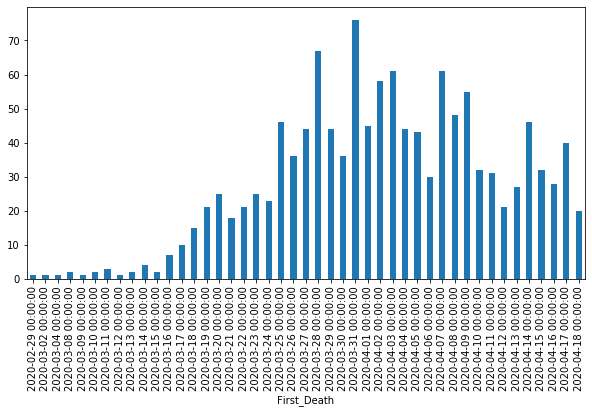

In [15]:
plt.figure(figsize = (10,5))
data_first_death.groupby(data_first_death["First_Death"]).County_Name.count().plot(kind="bar")
#sns.distplot(data_first_death['First_Death'], kde=False, rug=True);
#sns.scatterplot(,y=data_first_death['Mortality_Rate'])

# §2. EDA and Model #1
Specifically, we explore on 2 data sets: abridged_couties & 4.18states

### 2.1 Mortality rate

Let's do some visualization and see whether there are some relationship between different variables.

### Mortality rates' outlier and overlapping points

Plot the distribution of mortality rate and see if we can find something interesting.

In [16]:
# mortality_rate = data_states1['Mortality_Rate']
# #operate_data_counties1['mortality_rate'] = operate_data_counties1[operate_data_counties1['State'].isin(mortality_rate.index)]

# plt.figure(figsize = (5,5))
# sns.distplot(data_states1['Mortality_Rate'])
# plt.figure(figsize = (5,5))
# sns.scatterplot(x=data_states1['Province_State'],y=data_states1['Mortality_Rate'])

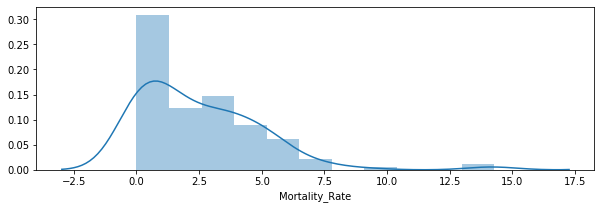

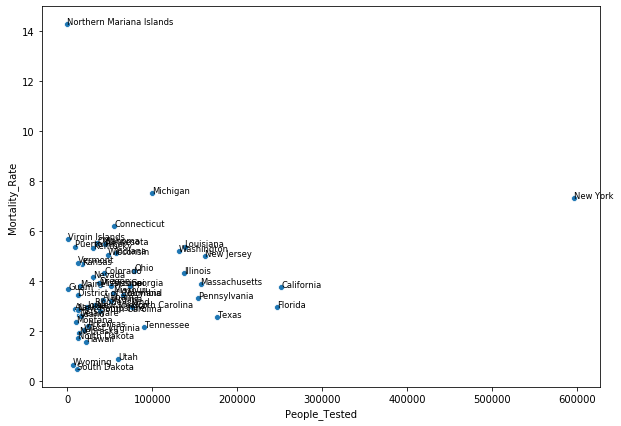

In [17]:
#added 5/10 sunday by Jack
mortality_rate = data_states1['Mortality_Rate']
#operate_data_counties1['mortality_rate'] = operate_data_counties1[operate_data_counties1['State'].isin(mortality_rate.index)]

plt.figure(figsize = (10,3))
sns.distplot(data_states1['Mortality_Rate'])
plt.figure(figsize = (10,7))
p1 = sns.scatterplot(x=data_states1['People_Tested'],y=data_states1['Mortality_Rate'])

for line in range(0,data_states1.shape[0]):
  if data_states1['People_Tested'][line] >0 and data_states1['Mortality_Rate'][line] >0:
     p1.text(data_states1['People_Tested'][line]+0.2, data_states1['Mortality_Rate'][line], data_states1['Province_State'][line],
         #data_states1['People_Tested'],data_states1['Mortality_Rate'],data_states1['Province_State'], 
             horizontalalignment='left', size='small', color='black') #, weight='semibold')

In [18]:
#mortality_rate.value_counts()
#data_states1[data_states1['Mortality_Rate']>8]

Two interesting things to note: 

1: overlapping: there are 28 points of 0 mortality rate.

2: outliers: three states have mortality rate>8%. It seems like they have high mortality rates because they have pretty small population? The confirmed cases and death cases are pretty low.

### Update state representation

For table 2, there are >150 entries with NaN values in "State". Here we add a new column to table 2 called "State update", where we fill in the NaN values for State based on the state abbreviation column.

In [19]:
state_abbreviation = data_counties1.groupby(['StateName', 'State']).agg(sum)#['StateName']
state_dict_original = state_abbreviation.reset_index()[['StateName', 'State']]
new_state_df = pd.DataFrame({'StateName': ['AK','VI', 'PR', "HI", 'GU',"AS",'MP'], 
                             'State': ['Alaska', 'Virgin Islands','Puerto Rico','Hawaii', "Guam",'American Samoa'
                                      ,'Northern Marianas']})
state_dict_combined = pd.concat([state_dict_original, new_state_df])
state_dict = state_dict_combined.set_index('StateName')['State']
mapped_state = data_counties1['StateName'].map(state_dict)
mapped_state.isna().sum()
#state_dict

0

### Append mortality to table 2

Here we add a new column to table 2 called "Mortality Rate", which corresponds to the "Mortality_Rate" column in table 1, and mapped the mortality rate to each county based on which state it is in.

**Question about methodology**: Is it valid to take the aggregate data from a bigger granularity (state) to a data of lower granularity (county)? The mortality rate in different county is different, and since each county has different population, we cannot generalize one state's mortality rate to all counties in it?



In [20]:
data_counties1['State updated'] = mapped_state
mortality_dict = data_states1[data_states1['Country_Region'] == 'US'][['Province_State', 'Mortality_Rate']].set_index('Province_State')['Mortality_Rate']
mapped_mortality = data_counties1['State updated'].map(mortality_dict)
mapped_mortality.isna().sum() #should be American Samoa 
data_counties1['Mortality Rate'] = mapped_mortality
data_counties1.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,State updated,Mortality Rate
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4354,NaN,NaN,NaN,Alabama,3.247029
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.2162,NaN,NaN,NaN,Alabama,3.247029
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.9959,6.08,5400.0,18241.0,Alabama,3.247029
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.6003,2.75,14980.0,6120.0,Alabama,3.247029
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4242,7.21,31850.0,25233.0,Alabama,3.247029


Plot when does each county discover the first case/death casued by the virus

Text(0.5, 1.0, 'Distribution of First discovered case by county')

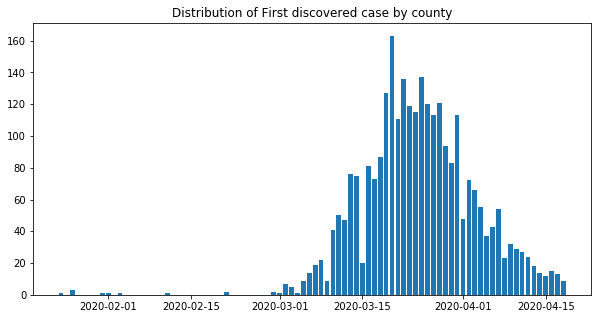

In [21]:
first_case_count = data_conf1['First_Case'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(first_case_count.index, first_case_count.values)
plt.title("Distribution of First discovered case by county")

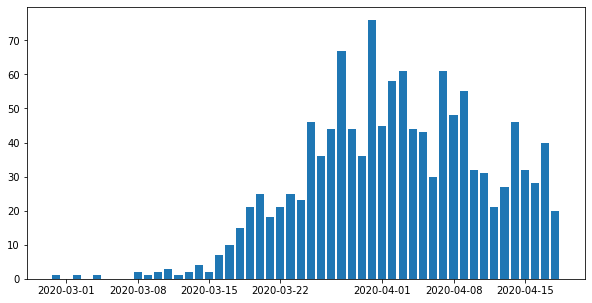

In [22]:
first_death_count = data_death1['First_Death'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(first_death_count.index, first_death_count.values)
plt.show()

### Feature Selection

To begin with, we first take an "educated guess" and select a few features of interest in the second table, which we think will affect the death rate of Covid 19. 

We also want to drop American Samoa and Northern Marianas because they do not have mortality rates. We also manually fill in the mortality rate for DC (don't know why it was not there). 

In [23]:
operate_data_counties1 = data_counties1[['CountyName', 'State updated', 'stay at home', 'public schools', '>500 gatherings', 'entertainment/gym', 'restaurant dine-in',
                                 'Mortality Rate']][data_counties1['State updated'] != 'American Samoa'][data_counties1['State updated'] != 'Northern Marianas']
#operate_data_counties1[operate_data_counties1['CountyName']=='Washington']
operate_data_counties1['Mortality Rate'] = operate_data_counties1['Mortality Rate'].fillna(3.413353)
operate_data_counties1_with_states = operate_data_counties1
operate_data_counties1_with_states

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate
0,Autauga,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
1,Baldwin,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
2,Barbour,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
3,Bibb,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
4,Blount,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
...,...,...,...,...,...,...,...,...
3235,Petersburg Borough,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242
3236,Prince of Wales-Hyder Census Area,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242
3237,Skagway Municipality,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242
3238,Wrangell City and Borough,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242


###  Missing Values

#2 Now we will look at missing values.

In [24]:
operate_data_counties1.isnull().sum()

CountyName            0
State updated         0
stay at home          0
public schools        0
>500 gatherings       0
entertainment/gym     0
restaurant dine-in    0
Mortality Rate        0
dtype: int64

We should replace the NaN values of 'stay at home', 'public school', and '>500 gatherings' with the average value in their states. 

**For Now** for simplicity I will replace all values in the three columns with an average value of the whole table (which is incorrect but convenient). 

**An idea** We can also fill all the NaN values with .isna(method = 'ffill') to fill all the values with previous valid values, which saves more time and should work well, given that adjacent counties are likely to be in the same state.


In [25]:
operate_data_counties1_with_states['stay at home'] = operate_data_counties1_with_states['stay at home'].fillna(np.mean(operate_data_counties1_with_states['stay at home']))
operate_data_counties1_with_states['public schools'] = operate_data_counties1_with_states['public schools'].fillna(np.mean(operate_data_counties1_with_states['public schools']))
operate_data_counties1_with_states['>500 gatherings'] = operate_data_counties1_with_states['>500 gatherings'].fillna(np.mean(operate_data_counties1_with_states['>500 gatherings']))
operate_data_counties1_with_states.isnull().sum()
#operate_data_counties1_with_states[operate_data_counties1_with_states['stay at home'].isnull()]

CountyName            0
State updated         0
stay at home          0
public schools        0
>500 gatherings       0
entertainment/gym     0
restaurant dine-in    0
Mortality Rate        0
dtype: int64

Now we can see all the null values are filled.

### Outliers

#3 Let's observe whether there is any outlier for each feature. 

In [26]:
#operate_data_counties1_with_states['stay at home'].value_counts()
#operate_data_counties1_with_states['public schools'].value_counts()
#operate_data_counties1_with_states['>500 gatherings'].value_counts()

By observing the value_counts, we find that there is no significant outlier. 

**To Do:** Here we can also draw some scatter plot to show the relation between some features we choose and the response vector (death rate), and show they have positive correlation.

#### Join with first case/death

In [27]:
operate_data_counties1_with_states = operate_data_counties1_with_states.merge(
    data_conf1[["", "First_Case", "First_Hundred_Case"]], on = )

SyntaxError: invalid syntax (<ipython-input-27-fd641479d35f>, line 2)

## 2.2 PCA (for feature selection)

I have copied the below text from lecture slides. Not entirely sure how we can use PCA, but it should be an idea in performing feature selection.

Principal Component Analysis for Exploratory Data Analysis

Goal: Plot high dimensional data as a 2 dimensional approximation that results from a linear combinations of attributes.

Related Goal: Determine whether this two-dimensional plot is really showing the variability in the data. (If not, be wary of conclusions drawn using PCA.)

PCA is appropriate  for EDA when:

Visually identifying clusters of similar observations in high dimensions.

You are still exploring the data.
(If you already know what to predict, you probably don’t need PCA.)

You have reason to believe that the data are inherently low rank: there are many attributes, but only a few (perhaps unobserved) attributes mostly determine the rest through a linear association.


In [28]:
data_counties1_PCA = data_counties1.select_dtypes(['number']).drop(columns=['STATEFP','COUNTYFP'])
# center our data and normalize the variance
df_mean = np.mean(data_counties1_PCA)
df_centered = data_counties1_PCA - df_mean
df_centered_scaled = df_centered / (np.var(df_centered))**0.5
data_counties1_PCA = df_centered_scaled
data_counties1_PCA_fillna =data_counties1_PCA.fillna(method = 'ffill') #use the previous valid data to fill NaN,
                                                    #good here since closeby county likely to be in the same State

data_counties1_PCA_fillna2 = data_counties1_PCA_fillna.fillna(0) #fill NaN with no previous valid data (whole column is NaN)
#sum(data_counties1_PCA_fillna2.isna().sum())
data_counties1_PCA_fillna2

,lat,lon,POP_LATITUDE,POP_LONGITUDE,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,...,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,>50 gatherings,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,Mortality Rate
0,-1.093880,0.339804,-1.030803,0.352162,-1.025461,-0.171903,-0.173050,-0.168916,-0.604568,-0.197577,...,-0.187041,-0.173053,-0.253513,0.000000,-0.331332,-0.311028,0.000000,0.000000,0.000000,-0.488962
1,-1.464034,0.249909,-1.392132,0.259859,-0.652003,0.279422,0.258560,0.273454,-0.651782,0.482441,...,0.519100,0.529638,0.325153,0.000000,-0.331332,-1.093325,0.000000,0.000000,0.000000,-0.488962
2,-1.230714,0.443649,-1.152332,0.438344,0.468372,-0.257265,-0.250473,-0.259472,1.152099,-0.270234,...,-0.290112,-0.296852,-0.302130,0.000000,-0.331332,1.689324,0.523368,-0.308851,0.501064,-0.488962
3,-0.999598,0.299906,-0.932571,0.306055,-1.398919,-0.264159,-0.257251,-0.267154,1.483912,-0.292721,...,-0.296690,-0.324750,-0.329404,0.000000,-0.331332,0.277479,-0.137200,0.192754,-0.287400,-0.488962
4,-0.795923,0.346704,-0.761426,0.345078,-1.398919,-0.165681,-0.163990,-0.163946,-0.325366,-0.158420,...,-0.103708,-0.105051,-0.214382,0.000000,-0.331332,-0.351000,0.747525,1.076060,0.955889,-0.488962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,-2.518018,0.843769,3.470812,-3.040962,1.588746,-0.317452,-0.316122,-0.316315,1.290283,-0.353225,...,6.679197,8.320262,8.025681,1.249337,0.751802,0.508385,-0.603367,-0.554941,-0.593327,-0.773220
3236,-2.518018,0.843769,3.218156,-3.000628,1.588746,-0.308558,-0.305997,-0.308802,2.014156,-0.344930,...,-0.406340,-0.403215,8.025681,1.249337,0.751802,0.869555,-0.385161,-0.536616,-0.343342,-0.773220
3237,-2.518018,0.843769,3.961818,-3.200824,1.588746,-0.323213,-0.322600,-0.321673,0.688751,-0.361900,...,-0.406340,-0.403215,8.025681,1.249337,0.751802,-1.263560,-0.545840,-0.582430,-0.528603,-0.773220
3238,-2.518018,0.843769,3.391770,-2.982432,1.588746,-0.319448,-0.318466,-0.318206,1.112554,-0.354044,...,-0.406340,-0.403215,8.025681,1.249337,0.751802,0.140077,-0.545840,-0.582430,-0.528603,-0.773220


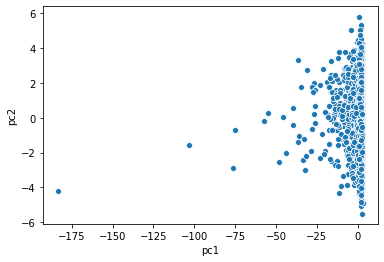

In [29]:
#PCA 
u, s, vt = np.linalg.svd(data_counties1_PCA_fillna2, full_matrices=False)
P = u @ np.diag(s)
df_1st_2_pcs =pd.DataFrame(P[:,0:2], columns=['pc1', 'pc2'])
first_2_pcs = df_1st_2_pcs

#jittered scatter plot (added noise)
first_2_pcs_jittered = first_2_pcs + np.random.normal(0, 0.1, size = (len(first_2_pcs), 2))
sns.scatterplot(data = first_2_pcs_jittered, x = "pc1", y = "pc2");

#a better looking scatter plot with labels
#import plotly.express as px
#px.scatter(data_frame = first_2_pcs_jittered, x = "pc1", y = "pc2", text = list(df_1972_to_2016.index)).update_traces(textposition = 'top center')

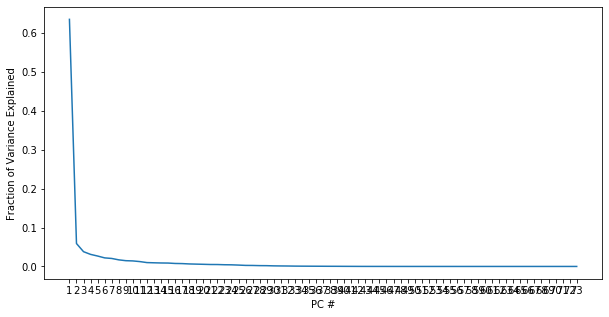

In [30]:
#scree plot
plt.figure(figsize = (10,5))
x = list(range(1, s.shape[0]+1)) 
plt.plot(x, s**2 / sum(s**2)); 
plt.xticks(x, x);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');

This plot doesn't make sense LOL why would latitude explain the variance this much. ???

## 2.3 Train-Test Split

#4 Let's do a train-test split.

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(operate_data_counties1_with_states, test_size=0.1, random_state=42)

Let's do some feature selection. What are some good features to use to predict death rates? 

### Selecting features

Let's draw some scatter plot to see whether some features' values increase with mortality rates. 

In [32]:
plt.figure(figsize = (5,5))
#sns.regplot(operate_data_counties1_with_states['Mortality_Rate'])

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [33]:
operate_data_counties1_with_states = operate_data_counties1_with_states.merge(data_first_case, how = "inner", left_on = ['CountyName', 'State updated'], right_on = ['County_Name', 'Province_State'])
operate_data_counties1_with_states = operate_data_counties1_with_states.merge(data_first_death, how = "left", left_on = ['CountyName', 'State updated'], right_on = ['County_Name', 'Province_State'])

operate_data_counties1_with_states.head()

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate,Province_State_x,First_Case,First_Hundred_Case,County_Name_x,Province_State_y,First_Death,County_Name_y
0,Autauga,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-24,2020-01-22,Autauga,Alabama,2020-04-07,Autauga
1,Baldwin,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-15,2020-04-16,Baldwin,Alabama,2020-03-29,Baldwin
2,Barbour,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-04-03,2020-01-22,Barbour,NaN,NaT,NaN
3,Bibb,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-30,2020-01-22,Bibb,NaN,NaT,NaN
4,Blount,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-25,2020-01-22,Blount,NaN,NaT,NaN


In [34]:
operate_data_counties1_with_states.drop(['Province_State_x', 'Province_State_y', 'County_Name_y', 'County_Name_x'], axis = 1, inplace = True)
operate_data_counties1_with_states.head()

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate,First_Case,First_Hundred_Case,First_Death
0,Autauga,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-24,2020-01-22,2020-04-07
1,Baldwin,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-15,2020-04-16,2020-03-29
2,Barbour,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-04-03,2020-01-22,NaT
3,Bibb,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-30,2020-01-22,NaT
4,Blount,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-25,2020-01-22,NaT


Calculate the time difference between the county's various responses to the date of the first discovered case.

In [35]:
time_since_first_case = operate_data_counties1_with_states.copy()
time_since_first_case['stay at home'] = time_since_first_case['stay at home'] - time_since_first_case['First_Case']
time_since_first_case['public schools'] = time_since_first_case['public schools'] - time_since_first_case['First_Case']
time_since_first_case['entertainment/gym'] = time_since_first_case['entertainment/gym'] - time_since_first_case['First_Case']
time_since_first_case['>500 gatherings'] = time_since_first_case['>500 gatherings'] - time_since_first_case['First_Case']
time_since_first_case['restaurant dine-in'] = time_since_first_case['restaurant dine-in'] - time_since_first_case['First_Case']
time_since_first_case.head()

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate,First_Case,First_Hundred_Case,First_Death
0,Autauga,Alabama,11 days,-8 days,-11 days,4 days,-5 days,3.247029,2020-03-24,2020-01-22,2020-04-07
1,Baldwin,Alabama,20 days,1 days,-2 days,13 days,4 days,3.247029,2020-03-15,2020-04-16,2020-03-29
2,Barbour,Alabama,1 days,-18 days,-21 days,-6 days,-15 days,3.247029,2020-04-03,2020-01-22,NaT
3,Bibb,Alabama,5 days,-14 days,-17 days,-2 days,-11 days,3.247029,2020-03-30,2020-01-22,NaT
4,Blount,Alabama,10 days,-9 days,-12 days,3 days,-6 days,3.247029,2020-03-25,2020-01-22,NaT


Some population percentage here. 

## 2.4 Model 1 : Classification 

### Basic Classification

#5 After selecting features, now we will make training set and test sets. 

In [36]:
X_train = train.drop(['CountyName', 'State updated','Mortality Rate'], axis=1)
Y_train = train['Mortality Rate']

X_train[:5], Y_train[:5]

(     stay at home public schools >500 gatherings entertainment/gym  \
 2582   2020-04-02     2020-03-23      2020-03-14        2020-03-19   
 1398   2020-04-06     2020-03-20      2020-03-25        2020-03-25   
 1176   2020-04-02     2020-03-15      2020-03-18        2020-03-24   
 646    2020-03-21     2020-03-17      2020-03-18        2020-03-18   
 1774   2020-03-21     2020-03-18      2020-03-16        2020-03-16   
 
      restaurant dine-in  
 2582         2020-03-19  
 1398         2020-03-25  
 1176         2020-03-18  
 646          2020-03-18  
 1774         2020-03-16  ,
 2582    2.544910
 1398    3.824862
 1176    3.778040
 646     4.317558
 1774    4.998772
 Name: Mortality Rate, dtype: float64)

Now we will make a linear regression model, fit the model with training data, and get the training loss. 

Loss function: I will use RMSE now but we can try other loss functions later. 

***Question: *** So what is a satisfying result loss for our model? How do we know how good our model is? 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics



model = LinearRegression(fit_intercept=True) # should fit intercept be true?
model.fit(X_train, Y_train)

Y_prediction = model.predict(X_train)


training_loss = metrics.mean_squared_error(Y_prediction, Y_train)
print("Training loss: ", training_loss)

TypeError: invalid type promotion

In [ ]:
plt.figure(figsize = (5,5))
sns.regplot(Y_prediction, Y_train)

Should also check residual plot to make sure it has no pattern.

In [38]:
plt.figure(figsize = (5,5))
sns.regplot(Y_prediction, Y_train-Y_prediction)

NameError: name 'Y_prediction' is not defined

<Figure size 360x360 with 0 Axes>

## 2.5 Model 1 : Cross-Validation

#6 Now let's perform cross-validation to check whether we are overfitting, and determine which features are useful. 

In [39]:
# perform cross validation
from sklearn import model_selection as ms

# finding which features to use using Cross Validation
errors = []
range_of_num_features = range(1, X_train.shape[1] + 1)
for N in range_of_num_features:
    print(f"Trying first {N} features")
    model = LinearRegression()
    
    # compute the cross validation error
    error = ms.cross_val_score(model, X_train.iloc[:, 0:N], Y_train).mean()
    
    print("\tScore:", error)
    errors.append(error)

best_num_features = np.argmax(errors) + 1
print (best_num_features)
best_err = min(errors)

print(f"Best choice, use the first {best_num_features} features")

Trying first 1 features


TypeError: invalid type promotion

## 2.x Regularization

#7 Here we perform regularization of data.

## 2.x Test

#8 Here we will test our model on test set and find its test accuracy. 

# §3. EDA and Model #2
Specifically, we explore on 2 data time-series: *data_time_case* & *data_time_death*.
<br>In this part, we will use PyTorch, a new powerful tool learned this semester to build models. This will help answer crucial question such as: How might historical trends inform our predictions on the number of coronavirus cases in a given day? Using the model, we can also extract useful parameters to give insights on the spread of the pandamic in different regions.

In [40]:
import time

$\color{red}{\text{DELETE THIS, variable name changed}}$.
3. data_covid_time_con	>	data_conf1
4. data_covid_time_dea >  data_death1

## 3.1. Using SIR Model for modeling pandemics

Since we want to predict future cases with exsiting data, we need a more complex model. One choice is the SIR model, a very well-known model for estimating the spread of pandemics. 
The SIR model is a type of compartmental model, because it separate the population into 3 compartments:
- $S(t)$: Susceptible (Can be infected but currently healthy)
- $I(t)$: Infected (Already carrying the disease)
- $R(t)$: Recovered (Have been infected before, cannot be infected again)

With a very simple model, we define 4 key parameters $\beta, D, \gamma, N$
- $\beta$: is the average number of contacts per person per time $\times$ probability of disease transmission in a contact between a susceptible and an infectious subject.
- $D$: is the number of days someone can carry and spread the disease.
- $\gamma$: is the the rate of recovery from infected to Recovered, intuitively $\gamma = \frac{1}{D}$.
- $N$: is the total population, $S(t)+I(t)+R(t)=N$

One other important variable is the basic reproduction number, $R_0$. It is the expected number of new infections from a single infection in a population where all subjects are susceptible. We can derive it using: $R_o = \beta \times (1/\gamma) = \beta / \gamma$

Now we can define the model by analyzing how the population of each group of people will change on a daily basis:
- $\frac{dS}{dt} = -\beta I(t)  \frac{S(t)}{N}$: number of susceptible will decrease by the number of new cases.
- $\frac{dI}{dt} = \beta  I(t)  \frac{S(t)}{N} - \gamma  I(t) $: number of infected will increase by the number of new cases and decrease by the number of recovered.
- $ \frac{dR}{dt} = \gamma  I(t)$: number of recovered increase as a protion of Infected.

Iterativly, we can project the number of daily cases using the update rules below. This can also be viewed as a solving the differential equations using Euler's method with a step size equals to 1 day.
- $S_{t+1} \leftarrow S_t -\beta  I_t  \frac{S_t}{N} $
- $ I_{t+1} \leftarrow I_t + \beta  I_t  \frac{S_t}{N} - \gamma  I_t $
- $ R_{t+1} \leftarrow R_t + \gamma  I_t $ (old)
<br>With in the method, there is 2 more values to keep track of, the number of new cases and the number of death. It updates using the rules:
- $ N_{t+1} \leftarrow S_t \beta  I_t  \frac{S_t}{N} $
- $ D_{t+7} \leftarrow N_t \times \text{death_rate} $ 
<br>Here we assume a portion of infected will die after 7 days of being infected. And the number of recovered is slightly modified to:
- $ R_{t+1} \leftarrow R_t + \gamma  I_t - D_{t+1}$ (new)


In [142]:
def SIRModel(beta, gamma, days= 100,s0=99,i0=1,r0=0,death=0.015):
    s_list = [s0];    i_list = [i0];    r_list = [r0]
    n_list = [i0];    c_list = [i0];    d_list = [0];    dt_list = [0]
    n = s0+i0+r0
    if isinstance(beta, list):
        for i in range(days):
            s_list.append(s_list[i]-beta[i]*i_list[i]*s_list[i]/n)
            i_list.append(i_list[i]+beta[i]*i_list[i]*s_list[i]/n - gamma*i_list[i])
            #r_list.append(r_list[i]+gamma*i_list[i])
            n_list.append(beta[i]*i_list[i]*s_list[i]/n)
            c_list.append(c_list[i]+beta[i]*i_list[i]*s_list[i]/n)
            if i < 7:  d_list.append(0)
            elif i>=7:   d_list.append(death*n_list[i-7])
            dt_list.append(sum(d_list))
            r_list.append(r_list[i]+gamma*i_list[i] - d_list[i+1])
    else:
        for i in range(days):
            s_list.append(s_list[i]-beta*i_list[i]*s_list[i]/n)
            i_list.append(i_list[i]+beta*i_list[i]*s_list[i]/n - gamma*i_list[i])
            #r_list.append(r_list[i]+gamma*i_list[i])
            n_list.append(beta*i_list[i]*s_list[i]/n)
            c_list.append(c_list[i]+beta*i_list[i]*s_list[i]/n)
            if i < 7:  d_list.append(0)
            elif i>=7:   d_list.append(death*n_list[i-7])
            dt_list.append(sum(d_list))
            r_list.append(r_list[i]+gamma*i_list[i] - d_list[i+1])
    return s_list, i_list, r_list, n_list, c_list,d_list, dt_list

In [143]:
def plotCovid(lists,labels):
    n = len(lists); days=len(lists[0])
    x = np.linspace(0,days,days)
    plt.figure(figsize = (10,5))
    for i in range(n):
        plt.plot(x,lists[i])
    plt.ylabel("number of person");plt.xlabel("days from 1st case")
    plt.legend(labels)
    plt.show()

Note: $R_0 = \beta \times D = \frac{\beta}{\gamma}$ 
<br>SARS is usually described as having an $R_0$ of 2 to 5
<br>Estimates of the R0 of Covid-19 vary widely. From studies in China or South Korea, the mean estimate of R0 is 2.63. From a wider survey of 16 published estimates, the mean estimate is 2.65(1.97, 3.09). The range is 0.4-4.6.
source: https://www.cebm.net/covid-19/when-will-it-be-over-an-introduction-to-viral-reproduction-numbers-r0-and-re/

In [177]:
D = 10; beta = 0.25; gamma = 1/D
print("R_0 = ",beta*D)
s_list1, i_list1, r_list1, n_list1, c_list1, d_list1, dt_list1 = SIRModel(beta,gamma,200,300000000,50) #995,1,0)#

R_0 =  2.5


In [178]:
D = 10; beta = 0.3; gamma = 1/D
print("R_0 = ",beta*D)
s_list3, i_list3, r_list3, n_list3, c_list3, d_list3, dt_list3 = SIRModel(beta,gamma,200,300000000,50,0,0.02) #995,1,0)#

R_0 =  3.0


What the Covid-19 pandamic will look like in US with SIR model:
   R0=300M, I0=50, R0=0, D=10, beta=0.25, gamma = 0.1, death_rate = 0.015


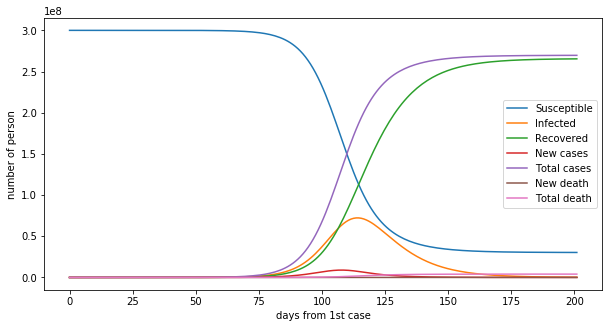

What the Covid-19 pandamic will look like in US with SIR model:
   R0=300M, I0=50, R0=0, D=10, beta=0.3, gamma = 0.1, death_rate = 0.02


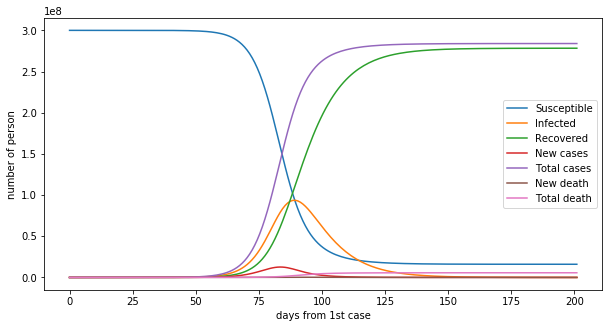

In [179]:
print("What the Covid-19 pandamic will look like in US with SIR model:\n   R0=300M, I0=50, R0=0, D=10, beta=0.25, gamma = 0.1, death_rate = 0.015")
plotCovid([s_list1,i_list1,r_list1,n_list1,c_list1,d_list1,dt_list1],
          ["Susceptible","Infected","Recovered","New cases","Total cases","New death","Total death"])
print("What the Covid-19 pandamic will look like in US with SIR model:\n   R0=300M, I0=50, R0=0, D=10, beta=0.3, gamma = 0.1, death_rate = 0.02")
plotCovid([s_list3, i_list3, r_list3, n_list3, c_list3, d_list3, dt_list3],
          ["Susceptible","Infected","Recovered","New cases","Total cases","New death","Total death"])
#plotCovid([n_list1,c_list1],["New cases","Total cases"])

Here we see that SIR model exist the bell-shaped curve of Daily new cases we observe in countries that already experienced the first wave of Covid-19 pandamic, such as China, South Korea, and Japan. However, the first confirmed case was reported much later in the US, and during the time frame the 2 data sets presents, we can confidently say we are still at the start of the wave. Now let's see what the actual data looks like.

## 3.2. Daily New confirmed cases/deaths
##### What does the data look like?

In [180]:
data_covid_time_con = data_conf0.copy()
data_covid_time_dea = data_death0.copy()
print(data_covid_time_con.shape, " |  from",data_covid_time_con.iloc[:,11].name,"to", data_covid_time_con.iloc[:,-1].name)
print(data_covid_time_dea.shape, "|  from",data_covid_time_dea.iloc[:,12].name,"to", data_covid_time_dea.iloc[:,-1].name)

(3255, 99)  |  from 1/22/20 to 4/18/20
(3255, 100) |  from 1/22/20 to 4/18/20


In [181]:
total_time_con = data_covid_time_con.sum(axis = 0, skipna = True) 
total_time_dea = data_covid_time_dea.sum(axis = 0, skipna = True) 
t001 = total_time_con[10:]    # 1/22 ~
t003 = total_time_dea[11:]    # 1/22~

In [182]:
# Here we find out the daily new cases/death by finding the difference between consecutive daily confirmed cases/death
t002 = []; t004 = []
for i in range(len(t001)-1):
    temp = t001[i+1] - t001[i]
    if temp > 0:        t002.append(temp)
    else:        t002.append(0)
for i in range(len(t003)-1):
    temp = t003[i+1] - t003[i]
    if temp > 0:        t004.append(temp)
    else:        t004.append(0)

50 50 2/29/20


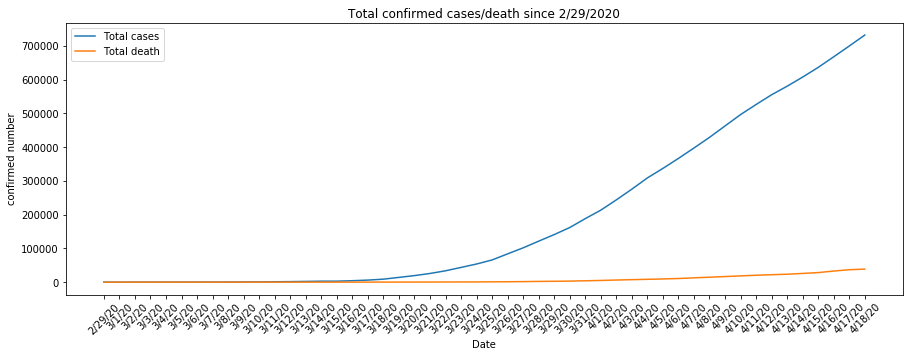

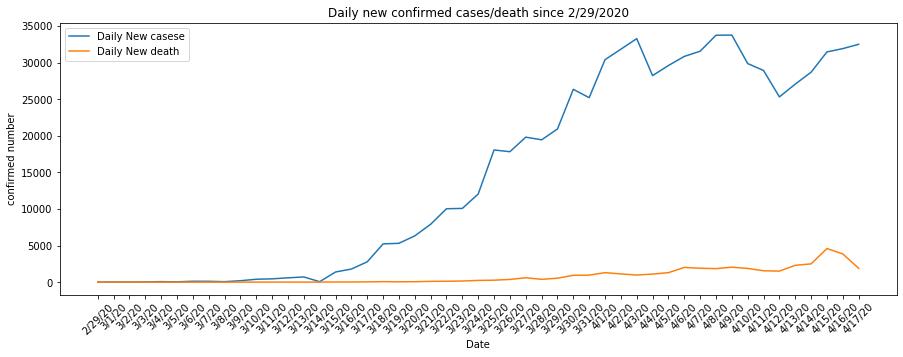

In [183]:
print(len(t001[38:]),len(t003[38:]),t001.index[38])
plt.figure(figsize=(15,5))
plt.plot(t001.index[38:], t001.values[38:]); plt.plot(t003.index[38:], t003.values[38:]); #plt.yscale("log")
plt.legend(["Total cases", "Total death"]); plt.title("Total confirmed cases/death since 2/29/2020"); 
plt.xlabel("Date"); plt.ylabel("confirmed number")
plt.xticks(rotation=45);plt.show()
print("")
plt.figure(figsize=(15,5))
plt.plot(t001.index[38:-1], t002[38:]); plt.plot(t003.index[38:-1], t004[38:])
plt.legend(["Daily New casese", "Daily New death"]);plt.title("Daily new confirmed cases/death since 2/29/2020"); 
plt.xlabel("Date"); plt.ylabel("confirmed number")
plt.xticks(rotation=45);plt.show()

## 3.3. Optimizing model with Gradient Descent
$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}  $$

bell shape functions:   https://www.wikiwand.com/en/Bell_shaped_function
$$ f(x) = ae^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

In [ ]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Let's see how real data compares to idea SIR model prediction:

## 3.5. The effect of social distancing
Of course the spread of Covid-19 is not as simple as SIR model assumed to be. First of all, the value of $\beta$ and $\gamma$ will change slightly at different time. With government policy such as social distancing and the increasing awareness of personal hygiene, the value of $\beta$ and $R_0$ will change dramatically, thus giving completely different result to a SIR model with constant $R_0$ value.

In the cells bellow, we established 2 models: 
- a) with $I_0$ = 50, $R_0$ = 6M (1/50 of US population), $D$=7, $\beta$=0.37 and 
- b) with $I_0$ = 50, $R_0$ = 6M, $D$=7, However, we start to implement social distancing at day 35, and with in a week, $R_0$ will drop from 2.59 to 1.26 and still at 1.26 until the end.

In [217]:
D = 7; beta = 0.37; gamma = 1/D; pop = 300000000/50
print("R_0 = ",beta*D)
s_list1, i_list1, r_list1, n_list1, c_list1, d_list1, dt_list1 = SIRModel(beta,gamma,150,pop,50) #995,1,0)#

beta = [0.37 for i in range(35)]+[0.35,0.32,0.30,0.28,0.26,0.24,0.22,0.20]+[0.18 for i in range(151-35-8)]
D = 7; gamma = 1/D; #pop = 300000000/50
print("R_0 = ",beta[0]*D,beta[50]*D)
s_list2, i_list2, r_list2, n_list2, c_list2, d_list2, dt_list2 = SIRModel(beta,gamma,150,pop,50) #995,1,0)#

R_0 =  2.59
R_0 =  2.59 1.26


Text(0.5, 1.0, 'How predictions using normal SIR and SIR with social distancing compare with actual Daily cases/deaths')

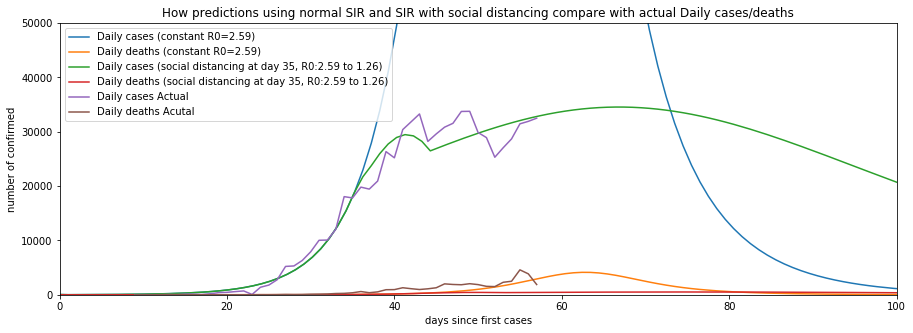

In [218]:
plt.figure(figsize = (15,5));
plt.plot(np.linspace(0,151,151),n_list1);plt.plot(np.linspace(0,151,151),d_list1)
plt.plot(np.linspace(0,151,151),n_list2);plt.plot(np.linspace(0,151,151),d_list2);
start_date = 9
plt.plot(np.linspace(0+start_date,48+start_date,49),t002[38:]);plt.plot(np.linspace(0+start_date,48+start_date,49),t004[38:])
plt.xlim(0,100),plt.ylim(0,50000);plt.legend(["Daily cases (constant R0=2.59)","Daily deaths (constant R0=2.59)",
     "Daily cases (social distancing at day 35, R0:2.59 to 1.26)","Daily deaths (social distancing at day 35, R0:2.59 to 1.26)",
    "Daily cases Actual","Daily deaths Acutal"])
plt.xlabel("days since first cases");plt.ylabel("number of confirmed");
plt.title("How predictions using normal SIR and SIR with social distancing compare with actual Daily cases/deaths")

Here, we see that the SIR model that included the effect of social distancing is a much better fit than SIR with a constant $R_0$. This graph shows just one of many variables we ignored when using only simple SIR to predict future cases/deaths.

In [220]:
# plotCovid([s_list2, i_list2, r_list2, n_list2, c_list2, d_list2, dt_list2],
#           ["Susceptible","Infected","Recovered","New cases","Total cases","New death","Total death"])

What SIR model predict about US daily New cases, Death, and Total death 
   R0=300M, I0=50, R0=0, D=10, beta=0.25, gamma = 0.1, death_rate = 0.015


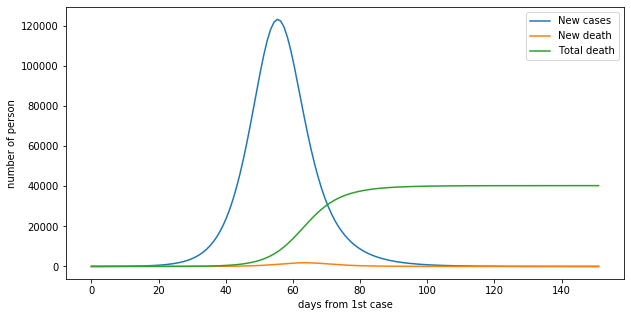

In [120]:
print("What SIR model predict about US daily New cases, Death, and Total death \n   R0=300M, I0=50, R0=0, D=10, beta=0.25, gamma = 0.1, death_rate = 0.015")
plotCovid([n_list1,d_list1,dt_list1],["New cases","New death","Total death"])
# print("What SIR model predict about daily new death")
# plotCovid([d_list1],["New death"])
#plotCovid([n_list1, c_list1])

## 9. Conclusion

#9 We can also fit other models (like logistic model?) with our training data, and test on test set about their accuracy.